Company X Ad Visibility Analysis by Arkadiuz Mercado
Thank you to Kaggle user: naniruddhan for the dataset

Background: 

Online Advertising Performance Data

The dataset provides insights into the online advertising performance of a company, referred to as "Company X", from April 1, 2020, to June 30, 2020. The Currency of the "Cost" Column is the US Dollar

Questions to be Answered:

1. Which ad placements, banners, or campaigns are the most effective in terms of user engagement and ROI?
2. How does user engagement affect post-click conversions and sales performance?
3. What are the trends in ad visibility (clicks, conversions) over time, and which campaigns/placements are most effective over different periods?

Data Exploration Analysis Using Pandas:

In [1]:
import pandas as pd

In [2]:
##Cleaning up DataFrame
df = pd.read_csv('online_advertising_performance_data.csv')

##Giving Placement (Where Ads were Ran on Actual Real-Life Examples)
df['placement'] = df['placement'].fillna('Physical')
df['placement'].unique()
df.loc[df['placement'] == 'abc', 'placement'] = 'NYT'
df.loc[df['placement'] == 'def', 'placement'] = 'Morning Brew'
df.loc[df['placement'] == 'ghi', 'placement'] = 'Buzzfeed'
df.loc[df['placement'] == 'mno', 'placement'] = 'CNBC'
df.loc[df['placement'] == 'jkl', 'placement'] = 'Forbes'

df = df.dropna(axis=1)
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,NYT,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,Morning Brew,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,Buzzfeed,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,CNBC,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,Morning Brew,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,Buzzfeed,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,CNBC,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,Buzzfeed,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,CNBC,4,0.0123,0,0.0000,0,0.0000


Gathering Intital Insights of the Data at Hand:

1. Which ad placements, banners, or campaigns are the most effective in terms of user engagement and ROI?

In [3]:
##Removing Unuseful Data (Data with no Displays, no Cost, or Clicks) as this is a focus on paid, viewed, and interacted with advertisements
df = df[(df['displays'] > 0) & (df['cost'] > 0) & (df['clicks'] > 0)]

In [4]:
##Creating New Columns

#Click Through Rate 
df['ctr'] = (df['clicks']/df['displays']) * 100 

#Cost Per Click
df['cpc'] = (df['cost']/df['clicks'])

#Conversion Rate
df['cr'] = (df['post_click_conversions']/df['clicks']) * 100

#Return on Investment
df['roi'] = ((df['revenue'] - df['cost'])/df['cost']) * 100

/var/folders/3h/z43hyk551gv2zxp8zblssnjc0000gn/T/ipykernel_56132/1722460192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctr'] = (df['clicks']/df['displays']) * 100
/var/folders/3h/z43hyk551gv2zxp8zblssnjc0000gn/T/ipykernel_56132/1722460192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpc'] = (df['cost']/df['clicks'])
/var/folders/3h/z43hyk551gv2zxp8zblssnjc0000gn/T/ipykernel_56132/1722460192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [5]:
df.describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,ctr,cpc,cr,roi
count,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000,10511.000000
mean,15.442394,22692.946247,16.652371,237.164399,26.283360,62.002283,3112.261947,1.178496,0.081694,18.317377,177.383411
std,8.776530,52217.205449,54.126467,871.571146,116.238771,256.350437,12619.491577,3.663542,0.084082,46.107826,1090.178064
min,1.000000,1.000000,0.000200,1.000000,0.000000,0.000000,0.000000,0.032237,0.000162,0.000000,-100.000000
25%,8.000000,1017.000000,0.296400,5.000000,0.429900,0.000000,0.000000,0.345104,0.023700,0.000000,-20.264110
50%,15.000000,4232.000000,1.136300,25.000000,1.845000,1.000000,19.435700,0.620155,0.055071,0.898876,65.396341
75%,23.000000,18597.500000,5.871400,108.000000,8.666300,8.000000,606.655050,1.206787,0.110946,19.354839,183.898875
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,139.393939,1.241500,1600.000000,53700.000000


Before getting into specifics, I like to get an idea of how the company is currently doing to see if there are areas that need greater focus than others.

First, an ideal Click Through Rate (CTR) would be around 2-5%, clearly they are under that with an average CTR of 1.2%. However, there are likely advertisements which are of a low display count, which could provide an inflation of the rate, and is worth looking into.

Second, the Conversion Rate (CR), a great rate is around 10%, and considering the current average CR is at 18.3, this is at an exceptional level, and one that can be improved but is not primary issue.

Third, the average ROI currently is listed at 177%, meaning that on average, each ad is bringing in $2.77 in revenue per $1, an exceptional number. 

While these numbers look great overall, it's important to ensure there is not an inflation of these averages by advertisements with low-counts of display. This is especially likely considering the high Standard Deviations in PCC, PCSA, CTR, CR, and ROI. 

In [6]:
##Visualize Distribution
import seaborn as sns
import matplotlib.pyplot as plt

Now Having Created Key Measurements, I want to compare the overall

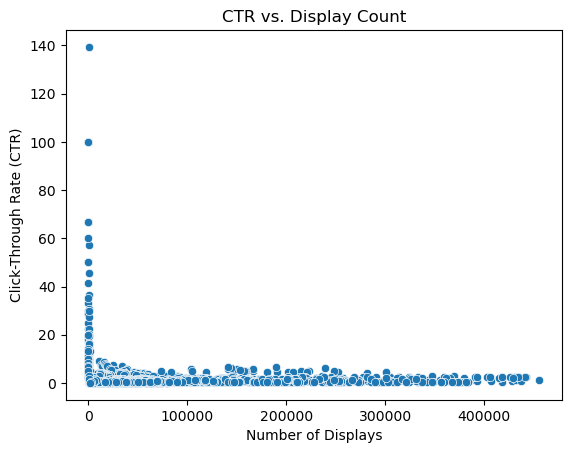

In [7]:
##Scatter Plot to Determine Influx of 
plt.figure()
sns.scatterplot(x=df['displays'], y=df['ctr'])

plt.title('CTR vs. Display Count')
plt.xlabel('Number of Displays')
plt.ylabel('Click-Through Rate (CTR)')

# Show the plot
plt.show()

From the following distribution, there seems to be a solid amount of outliers in the lower stages of displays, as well as what seems to be some incorrect data (CTR should not exceed 100%, meaning there are some unrealized errors and flawed statistics. This needs to be fixed!)

From the scatter plot and considering the average number of displays is about 22,692, lets cut out any ads that reached less than 1000 displays.

In [8]:
##Removing Flawed Data and Rounding numbers for cleanliness
df = df[df['ctr'] <= 100]
df = df[df['cr'] <= 100]

df['ctr'] = round(df['ctr'], 2)
df['cpc'] = round(df['cpc'], 2)
df['cr'] = round(df['cr'], 2)
df['roi'] = round(df['roi'], 2)

df[df['displays'] > 1000].describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,ctr,cpc,cr,roi
count,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000,7679.000000
mean,15.280766,29736.741242,21.660381,317.758172,35.253086,78.631072,3968.828026,0.846303,0.080573,15.461771,99.142490
std,8.770308,58282.872252,61.645286,1006.466854,134.770554,292.283580,14415.343377,0.866000,0.080938,23.279343,178.378244
min,1.000000,1001.000000,0.009300,1.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,-100.000000
25%,8.000000,2978.000000,0.772000,15.000000,1.083750,0.000000,0.000000,0.310000,0.020000,0.000000,-17.620000
50%,15.000000,8313.000000,2.293300,50.000000,3.501300,2.000000,102.081100,0.560000,0.060000,2.690000,63.570000
75%,23.000000,26226.000000,9.307850,164.500000,15.000000,16.500000,1080.879150,1.030000,0.110000,21.620000,167.655000
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,13.240000,1.240000,100.000000,7479.880000


Great! The data looks to be in closer range and thus being more reliable with this adjustment! This is a note I will keep in mind with future SQL Queries. I will not be removing these low display rows yet however, as I will be eventually looking into which types of advertisements are likely to cause them. 

Now it's time to import this into SQL!

In [9]:
##Converting to a new cleaned CSV for future Tableau Visualizations and to import into SQL
df.to_csv('cleaned_advertising_data.csv', index=False)